# Insights from stackoverflow survey data. 
The ipython notebook is based on the following package:<br /> 
- pandas:1.1.1
- matplotlib:3.3.1
- numpy: 1.19.1
- ipython:7.18.1
- notebook:6.1.1


# Business Understanding
It is very glad to see more articles about female programmers. In the community still dominated by males, it is really pleasant to see the situation. But it seems we still lack concrete reports that give us a whole picture. We are still lacking insight into the following questions:
- Are female programmers satisfiedn with the job?  (Who is involved)
- Which kind of job task do they perform?  (What happend)
- What is the trend of female programmer percentage ? (when did it happen)
- Which country has higher female programmer percentage ? (Where did it happen)
 

# Data Understanding
It is very difficult to give a correct answer to the above questions. Thus we need to collect data to help us understand. Stack overflow has published its survey data over the past years. It is a good source to help us.

## Import Data
The first step is to import the data. The original data is provided by Stackoverflow. You can find the full dataset [here](https://insights.stackoverflow.com/survey). The survey starts from 2011 and the latest is carried out in 2020. However, not all the dataset has the information of interest. I this study, we mainly use the data from 2014 to 2020.<br /> 
The data has been downloaded and put into a folder (Summary_Data). 

In [1]:
import pandas as pd 
import numpy as np 
import os
# Define the data source
DataDic = {'2011':'2011 Stack Overflow Survey Results.csv',
           '2012':'2012 Stack Overflow Survey Results.csv',
           '2013':'2013 Stack Overflow Survey Responses.csv',
           '2014':'2014 Stack Overflow Survey Responses.csv',
           '2015':'2015 Stack Overflow Survey Responses.csv',
           '2016':'2016 Stack Overflow Survey Responses.csv',
           '2017':'2017_survey_results_public.csv',
           '2018':'2018_survey_results_public.csv',
           '2019':'2019_survey_results_public.csv',
           '2020':'2020_survey_results_public.csv'}
DataSchema = {'2017':'2017_survey_results_schema.csv',
              '2018':'2018_survey_results_schema.csv',
              '2019':'2019_survey_results_schema.csv',
              '2020':'2020_survey_results_schema.csv',}

CFolder = os.getcwd()
# Import Data
dfDic={}
for xx in DataDic.keys():
    dfDic[xx] = pd.read_csv(CFolder + "\\Summary_Data\\" + DataDic[xx])
    print('Loading', xx, 'is finished')
SchemaDic={}
for xx in DataSchema.keys():
    SchemaDic[xx] = pd.read_csv(CFolder +'\\Summary_Data\\' + DataSchema[xx])
    print('Loading the schema of',xx,'is finished')

Loading 2011 is finished
Loading 2012 is finished
Loading 2013 is finished
Loading 2014 is finished
Loading 2015 is finished
Loading 2016 is finished
Loading 2017 is finished
Loading 2018 is finished
Loading 2019 is finished
Loading 2020 is finished
Loading the schema of 2017 is finished
Loading the schema of 2018 is finished
Loading the schema of 2019 is finished
Loading the schema of 2020 is finished


In [2]:
for year in DataDic.keys():
    print (dfDic[year].head())
# It seems that the Stackoverflow survey have use different questions over years.

 NaN                          NaN   
3                                NaN                          NaN   
4                                NaN                          NaN   

  Current Lang &amp; Tech: Arduino  ...  \
0                          NaN  ...   
1                          NaN  ...   
2                          NaN  ...   
3                          NaN  ...   
4                          NaN  ...   

  Why use Stack Overflow: I don&#39;t use Stack Overflow  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

  How often are Stack Overflow&#39;s answers helpful  \
0                                        Usually   
1                                        Usually   
2                                         Rarely   
3                               

In [3]:
# Have a closer look at the Survey Quesitions over years
for year in DataDic.keys():
    print ('Year:', year)
    print (dfDic[year].columns)

Year: 2011
Index([&#39;What Country or Region do you live in?&#39;,
       &#39;Which US State or Territory do you live in?&#39;, &#39;How old are you?&#39;,
       &#39;How many years of IT/Programming experience do you have?&#39;,
       &#39;How would you best describe the industry you work in?&#39;,
       &#39;Which best describes the size of your company?&#39;,
       &#39;Which of the following best describes your occupation?&#39;,
       &#39;How likely is it that a recommendation you make will be acted upon?&#39;,
       &#39;What is your involvement in purchasing? You can choose more than 1.&#39;,
       &#39;Unnamed: 9&#39;, &#39;Unnamed: 10&#39;, &#39;Unnamed: 11&#39;, &#39;Unnamed: 12&#39;,
       &#39;Unnamed: 13&#39;, &#39;Unnamed: 14&#39;,
       &#39;What types of purchases are you involved in?&#39;, &#39;Unnamed: 16&#39;,
       &#39;Unnamed: 17&#39;, &#39;Unnamed: 18&#39;, &#39;Unnamed: 19&#39;, &#39;Unnamed: 20&#39;,
       &#39;What is your budget for outside expen

# Data Prepartion
From the column names of surveys over years, we can select the ones that we need. We need to store the column names into variables. Moreover, for a same question, the column name can be different. Sometimes question differs by a single letter, such as 'Country' or 'country'. The difference can be more significant. For example, the question can be "What country do you live in". After the reading, we need to rename the column names to make them consistent over years. 


In [4]:
# Dictionary to hold the names of columns of interest. 

# Gender
Gender_dic = {'2014': 'What is your gender?',
              '2015': 'Gender',
              '2016': 'gender',
              '2017': 'Gender',
              '2018': 'Gender',
              '2019': 'Gender',
              '2020': 'Gender'}
# Country
Country_dic = {'2014': 'What Country do you live in?',
               '2015': 'Country',
               '2016': 'country',
               '2017': 'Country',
               '2018': 'Country',
               '2019': 'Country',
               '2020': 'Country'}

# Job satisfaction
Satis_dic = {'2014': 'How did you find out about your current job?',
             '2015': 'Job Satisfaction',
             '2016': 'job_satisfaction',
             '2017': 'JobSatisfaction',
             '2018': 'JobSatisfaction',
             '2019': 'JobSat',
             '2020': 'JobSat'}

# Company size
# 2014 data do not make much sense, many data in date format. 
ComSize_dic = {'2014': 'How many developers are employed at your company?', 
               '2015': 'NA.',
               '2016': 'company_size_range',
               '2017': 'CompanySize',
               '2018': 'CompanySize',
               '2019': 'OrgSize',
               '2020': 'OrgSize'}

# Operating system
OpeSys_dic = {'2014': 'Which desktop operating system do you use the most?',
              '2015': 'Desktop Operating System',
              '2016': 'desktop_os',
              '2017': 'NA.',
              '2018': 'OperatingSystem',
              '2019': 'OpSys',
              '2020': 'OpSys'}

# Develop Environment
DevEnv_dic = {'2014': 'NA.',
              '2015': 'NA.',
              '2016': 'dev_environment',
              '2017':'IDE',
              '2018':'IDE',
              '2019': 'DevEnviron',
              '2020': 'NA.'}

# Maybe job task. Might be diffcult to summarize. In different despritive forms. 
JobTask_dic = {'2014': 'Which of the following best describes your occupation?',
               '2015': 'Occupation',
               '2016': 'occupation',
               '2017': 'DeveloperType',  
               '2018': 'DevType',
               '2019': 'DevType',
               '2020': 'DevType'}

# Function that provides a list of columns for different year. As well as the name afterwards.
def ColumnListYear(year):
    """
    The function is to provide the list of columns of interest. 
    INPUT:
        year: A string. for example '2020'
    
    OUTPUT:
        OriColNam: A list, The original column names
        UniColNam: A list, The unified column names. 

    Example:
        cc,dd = ColumnListYear('2020')
    """
    
    OriColNam = [] # define a list that contains original column names
    UniColNam = [] # define a list that contains uniform column names
    ColNames = ['Gender', 'Country', 'JobSatisfaction',
                'CompanySize', 'OS', 'IDE', 'JobTask']
    VarList = [Gender_dic, Country_dic, Satis_dic, 
               ComSize_dic, OpeSys_dic, DevEnv_dic, JobTask_dic]
    for counter, item in enumerate(VarList) :
        if item[year] != 'NA.':
            OriColNam.append(item[year])
            UniColNam.append(ColNames[counter])
    return OriColNam, UniColNam

For each year, only read the columns of interest. Store the read columns into a pandas.Dataframe object. Then summarize the dataframe of different years into a python dictionary object.

In [5]:
# For each year, make a seperate pandas dataframe that only stores the targeted columns. 
Years = list(Gender_dic.keys())
TargetdfDic = {}
for year in Years:
    TargetCols,RenameCols = ColumnListYear(year)
    TargetdfDic[year] = dfDic[year][TargetCols].copy() # copy to new dataframe
    TargetdfDic[year].rename(columns=dict(zip(TargetCols,RenameCols)), 
                             errors="raise", inplace = True)

# The first row of 2014 data must be dropped. It contains invalid data. 
TargetdfDic['2014'].drop(index=0, inplace=True)
print ('The survey data is loaded.')

The survey data is loaded.


## Length of dataset

In [6]:
# check the length of data. 
for year in Years:
    print(len(TargetdfDic[year]))
# So only use the data from 2016--2020

7643
26086
56030
51392
98855
88883
64461


Check the length of survey in each year. It seems that the quantities of survey in 2014 and 2015 are much less than other years. Thus only data from 2016 to 2020 are used.

## Categorical variables
This study is a descriptive study. Even though machine learning model is not employed, it is meaningful to check the important categorical variables in the first place. 

In [7]:
# Variables 
for year in Years:
    print (TargetdfDic[year]['Gender'].value_counts())

Male                      6864
Female                     352
Prefer not to disclose     130
Name: Gender, dtype: int64
Male                      23699
Female                     1480
Prefer not to disclose      437
Other                       128
Name: Gender, dtype: int64
Male                      51388
Female                     3202
Prefer not to disclose      722
Other                       274
Name: Gender, dtype: int64
Male                                                       31589
Female                                                      2600
Other                                                        225
Male; Other                                                  171
Gender non-conforming                                        160
Male; Gender non-conforming                                   65
Female; Transgender                                           56
Transgender                                                   55
Female; Gender non-conforming                     

As we see from the values about gender, the survey has chosen differnt answers in each year. Sometimes they are 'man' and 'women'. Sometimes, they are 'male' and 'female'. We need to make them consistent. So the the code below replace 'Man' to 'Male' and 'Woman' to 'Female'. 

In [8]:
# Replace values in dataframe. Convert 'Man' to 'Male' and 'Woman' to 'Female'.   
for year in Years:    
    TargetdfDic[year].replace(to_replace='Man', value='Male', inplace=True)
    TargetdfDic[year].replace(to_replace='Woman', value='Female', inplace=True)
print ('Data in the Gender column is cleaned.')

Data in the Gender column is cleaned.


## Check 'NaN' Values of the Categorical Variables 

In [9]:
Column_dropna = ['Gender', 'JobTask', 'JobSatisfaction', 'Country']
for year in Years[2:]:
    print (year, 'Gender NaN Ratio:', 
           TargetdfDic[year]['Gender'].isna().mean())
    print (year, 'Job Task NaN Ratio:', 
           TargetdfDic[year]['JobTask'].isna().mean())
    print (year, 'Job Satisfaction Nan Ratio:', 
           TargetdfDic[year]['JobSatisfaction'].isna().mean())
    print (year, 'Country Nan Ratio:', 
           TargetdfDic[year]['Country'].isna().mean())

    # if we drop all NaN in these four columns
    df_dropna = TargetdfDic[year].dropna(axis = 0, subset=Column_dropna).copy()
    print (year, 'if we drop all NaN, what is left:', len(df_dropna)/len(TargetdfDic[year]))


2016 Gender NaN Ratio: 0.00792432625379261
2016 Job Task NaN Ratio: 0.11620560414063895
2016 Job Satisfaction Nan Ratio: 0.2841334999107621
2016 Country Nan Ratio: 0.008959485989648403
2016 if we drop all NaN, what is left: 0.7072104229876852
2017 Gender NaN Ratio: 0.3180456102117061
2017 Job Task NaN Ratio: 0.29706958281444584
2017 Job Satisfaction Nan Ratio: 0.21435242839352428
2017 Country Nan Ratio: 0.0
2017 if we drop all NaN, what is left: 0.4955051369863014
2018 Gender NaN Ratio: 0.34784280006069496
2018 Job Task NaN Ratio: 0.06835263770168429
2018 Job Satisfaction Nan Ratio: 0.2992160234687168
2018 Country Nan Ratio: 0.004167720398563553
2018 if we drop all NaN, what is left: 0.5584947650599362
2019 Gender NaN Ratio: 0.039118841623257544
2019 Job Task NaN Ratio: 0.08492062599147193
2019 Job Satisfaction Nan Ratio: 0.2013320882508466
2019 Country Nan Ratio: 0.0014850983877681895
2019 if we drop all NaN, what is left: 0.7614954490735011
2020 Gender NaN Ratio: 0.21569631249903043


As we can see, 'NaN' values are everywhere. This is very common in surveys as the respondents will not leave answers both intentionally and unintentionally. We could select to drop all the 'NaN' values. But that will lead us to much less available data. This is intolerable. We might also think about imputing. But that will not make any sense because what we cared about are all categorial variables. Since this is more a descriptive study, imputing will not help neither. 

If we take a closer look at the quesitions that we are interested in, we will realize that we mostly study the correlation of two variables. So it would be enough if we only drop the 'NaN' values when they are in the columns related to that quesition. 

This is a compromise. We keep the largest amout of data and we do not let 'NaN' values influence our results. 

In [10]:
# doublecheck the answers in each column of different years. 
TargetdfDic['2016']['Gender'].value_counts()

Male                      51388
Female                     3202
Prefer not to disclose      722
Other                       274
Name: Gender, dtype: int64

# Question 1: Gender vs. job satisfaction

## Modeling

In [11]:
df = TargetdfDic['2020']
print (df['JobSatisfaction'].isna().mean())
df['JobSatisfaction'].value_counts()

0.2988939048416872


Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSatisfaction, dtype: int64

In [12]:
df = TargetdfDic['2020']
print (df['Gender'].isna().mean())
print (df['Gender'].value_counts())

0.21569631249903043
Male                                                           46013
Female                                                          3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64


## Evaluation
It seems that 21% of the answers about gender are NaN. This is quite common in surveys. Many might not answer the question. This can be explained by various reasons. However, due to the relatively large quantities of valid answers, the results will still make sense, especially when we just want to see an overall trend. Thus, we will drop the missing values. 

It would not make any sense if we imputing the gender or the job satisfaction. The best way is to drop the 'NaN' values in the study. 

Moreover, it seems that we get other answers than 'Male' and 'Female'. This is good to hear because that it shows the programming community is very open and welcoming. 

## Deployment

&lt;AxesSubplot:ylabel=&#39;JobSatisfaction&#39;&gt;

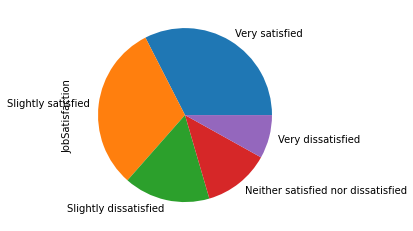

In [13]:
# Only use the survey specifically answered as 'Male' and 'Female'
df = TargetdfDic['2020']
Filter_df = df.loc[df['Gender'].isin(['Male', 'Female'])].copy()
Filter_df.dropna(axis = 0, subset=['JobSatisfaction'], inplace = True)

# Overall Job Satisfication 
Percent = Filter_df['JobSatisfaction'].value_counts()/len(Filter_df)
Percent.plot.pie()

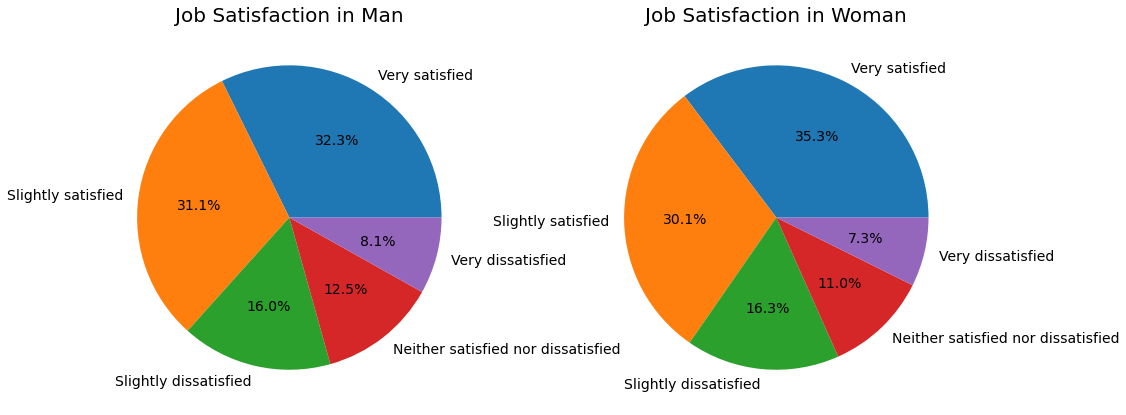

In [14]:
# Job Satisfication in different gender. 
JobSatPer={}
for gender in ['Male', 'Female']:
    df_Gender = Filter_df.loc[Filter_df['Gender'] == gender].copy()
    JobSatPer[gender] = df_Gender['JobSatisfaction'].value_counts()/len(df_Gender)

# Visualization
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure()
fig.set_size_inches(w=(16),h= (7))


ax1=fig.add_subplot(1,2,1)
ax1.pie(x=JobSatPer['Male'], labels = JobSatPer['Male'].index,
        autopct=lambda pct: "{:.1f}%".format(pct),
        textprops={'fontsize': 14})
ax1.set_title("Job Satisfaction in Man", fontsize = 20)    

ax2=fig.add_subplot(1,2,2)
ax2.pie(x=JobSatPer['Female'], labels = JobSatPer['Male'].index,
        autopct=lambda pct: "{:.1f}%".format(pct),
        textprops={'fontsize': 14})
ax2.set_title("Job Satisfaction in Woman", fontsize = 20)  

plt.show()


# Question 2: Gender vs. Job Task

## Modeling

In [15]:
TargetdfDic['2020']['JobTask'].value_counts()
# Must clean the dataset. 

Developer, full-stack                                                                                                                                          4424
Developer, back-end                                                                                                                                            3086
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                 2227
Developer, back-end;Developer, full-stack                                                                                                                      1476
Developer, front-end                                                                                                                                           1401
                                                                                                                                                               ... 
Developer, deskt

The job task question seems to be a multiple choice one. We need to clean the data. 

In [16]:
 # Defin a function to clean the job task. 
 def count_job_task(column_data):
    """
    To clean the dataset. The goal is to get the total count. 
    If a person has choosen many job tasks. The job should be divided by one.
    
    Input；
    column_data: A list or iterable, should not contain Nan values. 
    Output:
    A dicionary that contains the count. 

    """
    Dic_output = {}
    for AString in column_data:
        StringSplit = AString.split(';')
        StringLength = len(StringSplit)
        for single in StringSplit:
            if single in Dic_output.keys():
                Dic_output[single] += 1/StringLength
            else:
                Dic_output[single] = 1/StringLength
    return Dic_output

# Get the male job tasks
df = TargetdfDic['2020']
df_male = df.loc[df['Gender'] =='Male'].copy()
df_male.dropna(axis=0, subset=['JobTask'], inplace=True)
df_male_output = pd.Series(count_job_task(df_male['JobTask']))
MaleJobPer = df_male_output/df_male_output.sum()
MaleJobPer.sort_index(inplace = True) # sort by index to make sure consistence 
print (MaleJobPer)
#MaleJobPer.plot.bar()

# Get the female job tasks. 
df = TargetdfDic['2020']
df_Female = df.loc[df['Gender'] =='Female'].copy()
df_Female.dropna(axis=0, subset=['JobTask'], inplace=True)
df_Female_output = pd.Series(count_job_task(df_Female['JobTask']))
FemaleJobPer = df_Female_output/df_Female_output.sum()
FemaleJobPer.sort_index(inplace = True) # sort by index to make sure consistence 
print (FemaleJobPer)
#Female_percentage.plot.bar()


Academic researcher                              0.020019
Data or business analyst                         0.022246
Data scientist or machine learning specialist    0.025571
Database administrator                           0.023886
Designer                                         0.024017
DevOps specialist                                0.033198
Developer, QA or test                            0.020555
Developer, back-end                              0.199768
Developer, desktop or enterprise applications    0.071253
Developer, embedded applications or devices      0.029352
Developer, front-end                             0.111025
Developer, full-stack                            0.218761
Developer, game or graphics                      0.015042
Developer, mobile                                0.065785
Educator                                         0.014025
Engineer, data                                   0.020960
Engineer, site reliability                       0.009577
Engineering ma

## Evaluation
After clening the data, we count the percentage of each specic job task. The results are much more clear. We can then deploy the model. 

## Deployment

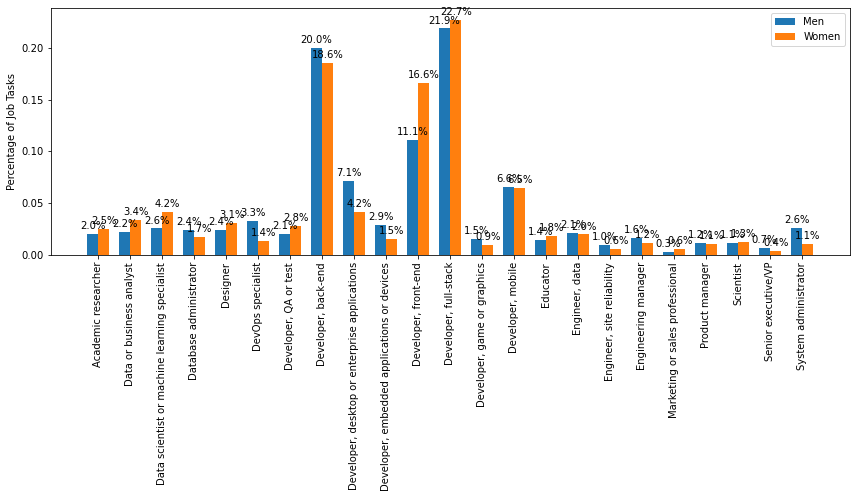

In [17]:
# Visualization
import matplotlib.pyplot as plt
import numpy as np
fig=plt.figure()
fig.set_size_inches(w=(12),h= (7))
ax=fig.add_subplot(111)

x = np.arange(len(MaleJobPer))  
width = 0.35 
labels = list(MaleJobPer.index)

rects1 = ax.bar(x - width/2, MaleJobPer, width, label='Men')
rects2 = ax.bar(x + width/2, FemaleJobPer, width, label='Women')

ax.set_ylabel('Percentage of Job Tasks')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90 )
ax.legend()

def autolabel(rects):
    '''
    This function can add label for each bar
    Input:
        rects: rectangle objects, which should be returned by the 
               matplotlib.axes.Axes.bar function.  
    '''
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height*100),
                    xy=(rect.get_x() + rect.get_width()/ 2, height),
                    xytext=(0,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


# Question 3: Female percentage over years

## Modeling and Evaluation
The modeling and evalution is done in question 1. We should exclude the 'NaN' answers and not to impute them. The following section show the deployment. 
## Deployment

In [18]:
# Check the female percentage in the survey. Excluding nan values. Not excluding "other" answers. 
FemalePerYear = {}
for year in Years[2:]:
    df = TargetdfDic[year]
    df.dropna(axis=0, subset=['Gender'],inplace=True)
    GenderPerYear = df['Gender'].value_counts()/len(df)
    FemalePerYear[year] = GenderPerYear['Female']
    print (year)
    print(FemalePerYear[year])

2016
0.05760443277084158
2017
0.0741860929608811
2018
0.0624331073849447
2019
0.07428049551553755
2020
0.07603299246395158


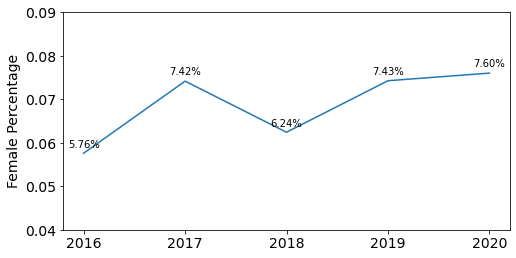

In [19]:
# Visualization
fig=plt.figure()
fig.set_size_inches(w=(8),h= (4))
ax=fig.add_subplot(111)

# draw a line
x_value = np.arange(len(Years[2:]))
ax.plot(x_value, FemalePerYear.values())
ax.set_ylim([0.04,0.09])
ax.set_xticks(x_value)  
ax.set_xticklabels(FemalePerYear.keys(), fontsize=14)
ax.set_ylabel('Female Percentage', fontsize=14)
ax.tick_params('y',labelsize = 14)

# Annonate to show data.
for (xx,yy) in zip(x_value, FemalePerYear.values()):
    ax.annotate('{:.2f}%'.format(yy*100),
                xy=(xx, yy),
                xytext=(0,4),
                textcoords="offset points",
                ha='center', va='bottom')
plt.show()

## Question 4-1: Female percentage in different countries
Use the 2020 data.

## Modeling

In [20]:
df = TargetdfDic['2020']
Country_Count = df['Country'].value_counts()
print (df['Country'].value_counts())
print (len(df['Country'].value_counts()))
print (Country_Count[Country_Count==1])

United States          10490
India                   5415
Germany                 3341
United Kingdom          3274
Canada                  1827
                       ...  
Saint Lucia                1
Antigua and Barbuda        1
Nauru                      1
Liechtenstein              1
Cape Verde                 1
Name: Country, Length: 173, dtype: int64
173
Guinea                 1
Lesotho                1
Timor-Leste            1
Papua New Guinea       1
Monaco                 1
Saint Lucia            1
Antigua and Barbuda    1
Nauru                  1
Liechtenstein          1
Cape Verde             1
Name: Country, dtype: int64


## Evaluation
It can be seen that there are more than 183 countries in the answers about country. There are more than 10 countries that have only 1 response. It would not make any sense if we check the percentage of female programmers in the countries with little response. So we need to draw a line. We can check the the countries with the highest answers and select the countries with answers more than 1000 pieces. 

## Deployment

In [21]:
# The countries with the largest participant numbers.
df = TargetdfDic['2020']
df['Country'].value_counts().nlargest(20)

# Select the countries with more than 1000 participants.
counts = df['Country'].value_counts()
CountryList = list(counts[counts>=1000].index)
df_CountryList = df.loc[df['Country'].isin(CountryList)]
df_CountryList['Country'].value_counts()

United States     10490
India              5415
Germany            3341
United Kingdom     3274
Canada             1827
France             1554
Brazil             1451
Netherlands        1137
Poland             1084
Australia          1027
Name: Country, dtype: int64

In [22]:
# Iterate through the countries and get the percentage of female
MalePercent = []
FemalePercent = []
OtherPercent = []
for country in CountryList:
    #df_OneCountry = df.loc[(df['Country'] == country) & (df['Gender'].isin(['Male', 'Female']))].copy()
    df_OneCountry = df.loc[(df['Country'] == country)].copy()
    df_OneCountry.dropna(axis=0, subset = ['Gender'], inplace = True)
    Percentage = df_OneCountry['Gender'].value_counts()/len(df_OneCountry)
    MalePercent.append(Percentage['Male'])
    FemalePercent.append(Percentage['Female'])
    OtherPercent.append(1-Percentage['Male']-Percentage['Female'])

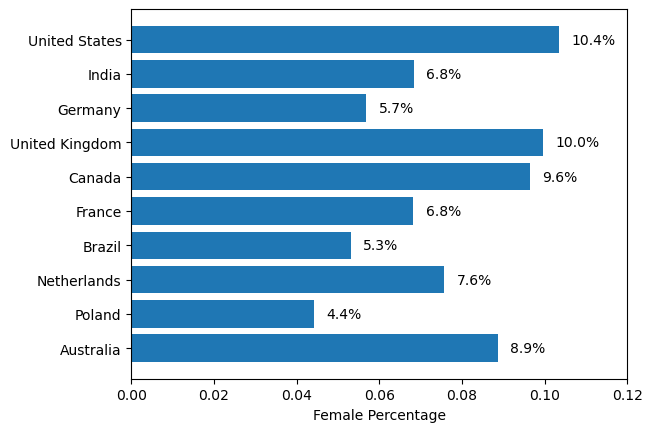

In [23]:
# Visualization 
import matplotlib.pyplot as plt
import numpy as np
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(CountryList))
ax.barh(y_pos, FemalePercent , align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(CountryList)
ax.invert_yaxis() 
ax.set_xlabel('Female Percentage')
ax.set_xlim([0,0.12])

# annotate
for (yy,height) in zip(y_pos, FemalePercent):
    ax.annotate('{:.1f}%'.format(height*100),
                xy=(height+0.003, yy),
                va='center')

plt.show()

# Question 4-2: Female percentage over years in selected countries
Use data from 2016 to 2020 to visualize the change of female percentage in selected countries.  

## Modeling

In [24]:
for year in Years[2:]:
    df = TargetdfDic[year]
    print (year)
    print (df['Country'].value_counts().nlargest(20))

for year in Years[2:]:
    df = TargetdfDic[year]
    print (year)
    print (df['Country'].value_counts().nlargest(6).sum()/len(df['Country']))

2016
United States         13482
United Kingdom         4547
India                  4162
Germany                3857
Canada                 2017
Poland                 1961
France                 1622
Russian Federation     1413
Sweden                 1325
Netherlands            1186
Italy                  1133
Australia              1113
Spain                  1024
Brazil                 1013
Romania                 940
Ukraine                 797
Denmark                 606
Switzerland             573
Belgium                 542
Portugal                496
Name: Country, dtype: int64
2017
United States         8546
United Kingdom        3259
Germany               2962
India                 2672
Canada                1630
France                1184
Poland                 933
Australia              702
Netherlands            637
Russian Federation     591
Spain                  571
Italy                  537
Brazil                 523
Sweden                 448
Switzerland            4

## Evaluation
We would like to include as many countries as possible in the analysis. However the Stack Overflow survey sometimes cannot collect enough answers in particular years. For example, only the top 7 countries have valid answers of more than 1000. Thus we should only study a limit amount of countries. We have decided to include the first six countries, because their total answers have just reached half of all answers including 'NaN'.  

## Deployment

In [25]:
# Heat map over year. Only the women percentage. 
# The top five countries over years. 
CountryList5 = CountryList[0:6]
SelectedYear = Years[2:]

for year in SelectedYear: 
    # Read the current year data and prepare a bland list.
    Data_year = []
    df = TargetdfDic[year]
    for country in CountryList5:
        #df_OneCountry = df.loc[(df['Country'] == country) & (df['Gender'].isin(['Male', 'Female']))].copy()
        df_OneCountry = df.loc[(df['Country'] == country)].copy()
        df_OneCountry.dropna(axis=0, subset = ['Gender'], inplace = True)
        Percentage = df_OneCountry['Gender'].value_counts()/len(df_OneCountry)
        Data_year.append(Percentage['Female'])
        array_year = np.array([Data_year])
    if year == SelectedYear[0]:
        ArrayData =  array_year
    else:
        ArrayData = np.vstack((ArrayData, array_year))
ArrayData

array([[0.06653316, 0.08721768, 0.0391496 , 0.05410161, 0.06098166,
        0.0351418 ],
       [0.0991107 , 0.08607784, 0.05165429, 0.06781221, 0.09202454,
        0.05405405],
       [0.08282426, 0.06547619, 0.04321541, 0.05566427, 0.08469055,
        0.04789383],
       [0.10368241, 0.06756757, 0.05223222, 0.07654987, 0.09496183,
        0.04892704],
       [0.10352717, 0.06832872, 0.0568692 , 0.09957239, 0.09633279,
        0.06821107]])

Visualize the data use 'heat map'. The following code is mainly from the matplotlib tutorial, which can be found [here](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html) (Date: 2010-10-04).

In [26]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """
    import matplotlib

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

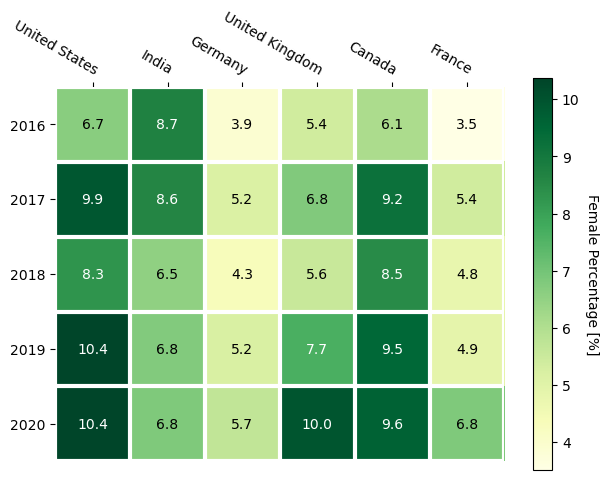

In [27]:
# Visualize the data
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
im, cbar = heatmap(ArrayData*100, SelectedYear, CountryList5, ax=ax,
                   cmap="YlGn", cbarlabel="Female Percentage [%]")
texts = annotate_heatmap(im, valfmt="{x:.1f}")

fig.tight_layout()
plt.show()

Most country has a upward trend in the percentage of female developers.
However, India has a negative trend. 